# Getting Started with Grid Status API

This notebook demonstrates how to use the Grid Status API to retrieve and visualize data about electricity grid datasets.

For more information about the API, please visit: https://www.gridstatus.io/api

To retrieve your API key, create a Grid Status account and go to the [settings page](https://www.gridstatus.io/settings/api) to get your API key.

This repository will have the latest version of the client and all the dependencies you need to run the example notebooks. Be sure to check out the [README](../README.md) for more information on how to get set up.

In [1]:
from gridstatusio import GridStatusClient

## Setting up the API client

First, we need to set up the GridStatusClient by providing our API key. You can either set the API key using the `GRIDSTATUS_API_KEY` environment variable or pass it to the constructor directly.

In [2]:
# client = GridStatusClient(api_key="YOUR_API_KEY_HERE")
client = GridStatusClient()

## Retrieving data from a dataset

You can retrieve data from a dataset by specifying its ID and the date range. Check out the [Data Catalog](https://www.gridstatus.io/datasets) for all Grid Status datasets accessible through the API. 
By default, the data is returned in UTC. 

*NOTE: Make sure to always set a `limit` for your queries to avoid exceeding the monthly row limit for your API key*

In [12]:
QUERY_LIMIT = 10_000

In [13]:
data_utc = client.get_dataset(
    dataset="ercot_spp_day_ahead_hourly",
    start="2023-04-01",
    end="2023-04-03",
    limit=QUERY_LIMIT,
)

data_utc

2025-07-28 08:37:33 - INFO - Fetching Page 1...
2025-07-28 08:37:33 - INFO - GET https://api.gridstatus.io/v1/datasets/ercot_spp_day_ahead_hourly/query
2025-07-28 08:37:33 - INFO - Params: {'start_time': Timestamp('2023-04-01 00:00:00'), 'end_time': Timestamp('2023-04-03 00:00:00'), 'publish_time_start': None, 'publish_time_end': None, 'limit': 10000, 'page': 1, 'page_size': None, 'resample_frequency': None, 'resample_by': None, 'resample_function': None, 'publish_time': None, 'timezone': None, 'cursor': '', 'filter_column': None, 'filter_value': None, 'filter_operator': '=', 'return_format': 'json', 'json_schema': 'array-of-arrays'}
2025-07-28 08:37:33 - INFO - Done in 0.31 seconds. 
2025-07-28 08:37:33 - INFO - Total rows: 10,000/10,000 (100.0% of limit)
2025-07-28 08:37:33 - INFO - Total number of rows: 10000


interval_start_utc          interval_end_utc      location  \
0    2023-04-01 00:00:00+00:00 2023-04-01 01:00:00+00:00          AEEC   
1    2023-04-01 00:00:00+00:00 2023-04-01 01:00:00+00:00  AGUAYO_UNIT1   
2    2023-04-01 00:00:00+00:00 2023-04-01 01:00:00+00:00   AJAXWIND_RN   
3    2023-04-01 00:00:00+00:00 2023-04-01 01:00:00+00:00  ALGOD_ALL_RN   
4    2023-04-01 00:00:00+00:00 2023-04-01 01:00:00+00:00      ALVIN_RN   
...                        ...                       ...           ...   
9995 2023-04-01 12:00:00+00:00 2023-04-01 13:00:00+00:00      BTE_PUN1   
9996 2023-04-01 12:00:00+00:00 2023-04-01 13:00:00+00:00      BTE_PUN2   
9997 2023-04-01 12:00:00+00:00 2023-04-01 13:00:00+00:00       BTM_ALL   
9998 2023-04-01 12:00:00+00:00 2023-04-01 13:00:00+00:00    BUCHAN_ALL   
9999 2023-04-01 12:00:00+00:00 2023-04-01 13:00:00+00:00   BUCKTHRN_RN   

      location_type            market    spp  
0     Resource Node  DAY_AHEAD_HOURLY -21.78  
1     Resource Node  DAY_AHEAD_HOURLY  37.30  
2     Resource Node  DAY_AHEAD_HOURLY  25.76  
3     Resource Node  DAY_AHEAD_HOURLY  52.90  
4     Resource Node  DAY_AHEAD_HOURLY  46.11  
...             ...               ...    ...  
9995  Resource Node  DAY_AHEAD_HOURLY  21.35  
9996  Resource Node  DAY_AHEAD_HOURLY  21.35  
9997  Resource Node  DAY_AHEAD_HOURLY  21.47  
9998  Resource Node  DAY_AHEAD_HOURLY  21.40  
9999  Resource Node  DAY_AHEAD_HOURLY  20.27  

[10000 rows x 6 columns]

## Retrieving data in local time

If you want to retrieve data in local time instead of UTC, you can pass `timezone` to the `get_dataset` method. The resulting data will have `_local` columns in the `timezone` and `_utc` columns in UTC.

In [14]:
data_local = client.get_dataset(
    dataset="ercot_spp_day_ahead_hourly",
    start="2023-04-01",
    end="2023-04-03",
    timezone="market",  # Return timestamps in market time (e.g. Central Time)
    limit=QUERY_LIMIT,
)

data_local

2025-07-28 08:38:26 - INFO - Fetching Page 1...
2025-07-28 08:38:26 - INFO - GET https://api.gridstatus.io/v1/datasets/ercot_spp_day_ahead_hourly/query
2025-07-28 08:38:26 - INFO - Params: {'start_time': Timestamp('2023-04-01 00:00:00'), 'end_time': Timestamp('2023-04-03 00:00:00'), 'publish_time_start': None, 'publish_time_end': None, 'limit': 10000, 'page': 1, 'page_size': None, 'resample_frequency': None, 'resample_by': None, 'resample_function': None, 'publish_time': None, 'timezone': 'market', 'cursor': '', 'filter_column': None, 'filter_value': None, 'filter_operator': '=', 'return_format': 'json', 'json_schema': 'array-of-arrays'}
2025-07-28 08:38:26 - INFO - Done in 0.37 seconds. 
2025-07-28 08:38:26 - INFO - Total rows: 10,000/10,000 (100.0% of limit)
2025-07-28 08:38:26 - INFO - Total number of rows: 10000


interval_start_local        interval_start_utc  \
0    2023-04-01 00:00:00-05:00 2023-04-01 05:00:00+00:00   
1    2023-04-01 00:00:00-05:00 2023-04-01 05:00:00+00:00   
2    2023-04-01 00:00:00-05:00 2023-04-01 05:00:00+00:00   
3    2023-04-01 00:00:00-05:00 2023-04-01 05:00:00+00:00   
4    2023-04-01 00:00:00-05:00 2023-04-01 05:00:00+00:00   
...                        ...                       ...   
9995 2023-04-01 12:00:00-05:00 2023-04-01 17:00:00+00:00   
9996 2023-04-01 12:00:00-05:00 2023-04-01 17:00:00+00:00   
9997 2023-04-01 12:00:00-05:00 2023-04-01 17:00:00+00:00   
9998 2023-04-01 12:00:00-05:00 2023-04-01 17:00:00+00:00   
9999 2023-04-01 12:00:00-05:00 2023-04-01 17:00:00+00:00   

            interval_end_local          interval_end_utc      location  \
0    2023-04-01 01:00:00-05:00 2023-04-01 06:00:00+00:00          AEEC   
1    2023-04-01 01:00:00-05:00 2023-04-01 06:00:00+00:00  AGUAYO_UNIT1   
2    2023-04-01 01:00:00-05:00 2023-04-01 06:00:00+00:00   AJAXWIND_RN   
3    2023-04-01 01:00:00-05:00 2023-04-01 06:00:00+00:00  ALGOD_ALL_RN   
4    2023-04-01 01:00:00-05:00 2023-04-01 06:00:00+00:00      ALVIN_RN   
...                        ...                       ...           ...   
9995 2023-04-01 13:00:00-05:00 2023-04-01 18:00:00+00:00      BTE_PUN1   
9996 2023-04-01 13:00:00-05:00 2023-04-01 18:00:00+00:00      BTE_PUN2   
9997 2023-04-01 13:00:00-05:00 2023-04-01 18:00:00+00:00       BTM_ALL   
9998 2023-04-01 13:00:00-05:00 2023-04-01 18:00:00+00:00    BUCHAN_ALL   
9999 2023-04-01 13:00:00-05:00 2023-04-01 18:00:00+00:00   BUCKTHRN_RN   

      location_type            market    spp  
0     Resource Node  DAY_AHEAD_HOURLY -65.24  
1     Resource Node  DAY_AHEAD_HOURLY  20.09  
2     Resource Node  DAY_AHEAD_HOURLY   7.65  
3     Resource Node  DAY_AHEAD_HOURLY  22.84  
4     Resource Node  DAY_AHEAD_HOURLY  19.77  
...             ...               ...    ...  
9995  Resource Node  DAY_AHEAD_HOURLY  41.03  
9996  Resource Node  DAY_AHEAD_HOURLY  41.03  
9997  Resource Node  DAY_AHEAD_HOURLY  40.41  
9998  Resource Node  DAY_AHEAD_HOURLY  37.19  
9999  Resource Node  DAY_AHEAD_HOURLY  35.34  

[10000 rows x 8 columns]

## Filtering data in the query

You can also filter data in your query by specifying a filter column and filter value. This can be helpful when you want to retrieve data for a specific location or node. For example, let's get the average day ahead price for the Houston Hub in April 2023.

In [15]:
data_houston_apr = client.get_dataset(
    dataset="ercot_spp_day_ahead_hourly",
    start="2023-04-01",
    end="2023-05-01",
    filter_column="location",
    filter_value="HB_HOUSTON",
    timezone="market",
    limit=QUERY_LIMIT,
)

data_houston_apr

2025-07-28 08:39:26 - INFO - Fetching Page 1...
2025-07-28 08:39:26 - INFO - GET https://api.gridstatus.io/v1/datasets/ercot_spp_day_ahead_hourly/query
2025-07-28 08:39:26 - INFO - Params: {'start_time': Timestamp('2023-04-01 00:00:00'), 'end_time': Timestamp('2023-05-01 00:00:00'), 'publish_time_start': None, 'publish_time_end': None, 'limit': 10000, 'page': 1, 'page_size': None, 'resample_frequency': None, 'resample_by': None, 'resample_function': None, 'publish_time': None, 'timezone': 'market', 'cursor': '', 'filter_column': 'location', 'filter_value': 'HB_HOUSTON', 'filter_operator': '=', 'return_format': 'json', 'json_schema': 'array-of-arrays'}
2025-07-28 08:39:26 - INFO - Done in 0.2 seconds. 
2025-07-28 08:39:26 - INFO - Total rows: 720/10,000 (7.2% of limit)
2025-07-28 08:39:26 - INFO - Total number of rows: 720


interval_start_local        interval_start_utc  \
0   2023-04-01 00:00:00-05:00 2023-04-01 05:00:00+00:00   
1   2023-04-01 01:00:00-05:00 2023-04-01 06:00:00+00:00   
2   2023-04-01 02:00:00-05:00 2023-04-01 07:00:00+00:00   
3   2023-04-01 03:00:00-05:00 2023-04-01 08:00:00+00:00   
4   2023-04-01 04:00:00-05:00 2023-04-01 09:00:00+00:00   
..                        ...                       ...   
715 2023-04-30 19:00:00-05:00 2023-05-01 00:00:00+00:00   
716 2023-04-30 20:00:00-05:00 2023-05-01 01:00:00+00:00   
717 2023-04-30 21:00:00-05:00 2023-05-01 02:00:00+00:00   
718 2023-04-30 22:00:00-05:00 2023-05-01 03:00:00+00:00   
719 2023-04-30 23:00:00-05:00 2023-05-01 04:00:00+00:00   

           interval_end_local          interval_end_utc    location  \
0   2023-04-01 01:00:00-05:00 2023-04-01 06:00:00+00:00  HB_HOUSTON   
1   2023-04-01 02:00:00-05:00 2023-04-01 07:00:00+00:00  HB_HOUSTON   
2   2023-04-01 03:00:00-05:00 2023-04-01 08:00:00+00:00  HB_HOUSTON   
3   2023-04-01 04:00:00-05:00 2023-04-01 09:00:00+00:00  HB_HOUSTON   
4   2023-04-01 05:00:00-05:00 2023-04-01 10:00:00+00:00  HB_HOUSTON   
..                        ...                       ...         ...   
715 2023-04-30 20:00:00-05:00 2023-05-01 01:00:00+00:00  HB_HOUSTON   
716 2023-04-30 21:00:00-05:00 2023-05-01 02:00:00+00:00  HB_HOUSTON   
717 2023-04-30 22:00:00-05:00 2023-05-01 03:00:00+00:00  HB_HOUSTON   
718 2023-04-30 23:00:00-05:00 2023-05-01 04:00:00+00:00  HB_HOUSTON   
719 2023-05-01 00:00:00-05:00 2023-05-01 05:00:00+00:00  HB_HOUSTON   

    location_type            market    spp  
0     Trading Hub  DAY_AHEAD_HOURLY  19.44  
1     Trading Hub  DAY_AHEAD_HOURLY  17.38  
2     Trading Hub  DAY_AHEAD_HOURLY  16.74  
3     Trading Hub  DAY_AHEAD_HOURLY  16.68  
4     Trading Hub  DAY_AHEAD_HOURLY  18.55  
..            ...               ...    ...  
715   Trading Hub  DAY_AHEAD_HOURLY  34.07  
716   Trading Hub  DAY_AHEAD_HOURLY  26.94  
717   Trading Hub  DAY_AHEAD_HOURLY  19.51  
718   Trading Hub  DAY_AHEAD_HOURLY  17.71  
719   Trading Hub  DAY_AHEAD_HOURLY  16.62  

[720 rows x 8 columns]

## Filter Operators

You can also use the `filter_operator` parameter to specify how to filter the data. For example, we can use the `in` operator to get data for both Houston and West Texas.

Supports `=`, `!=`, `>`, `<`, `>=`, `<=`, and `in`. Defaults to `=`. You can also filter by multiple values by passing a list of values to the `filter_value` parameter.

In [17]:
data_both_apr = client.get_dataset(
    dataset="ercot_spp_day_ahead_hourly",
    start="2023-04-01",
    end="2023-05-01",
    filter_column="location",
    filter_operator="in",
    filter_value=["HB_HOUSTON", "HB_WEST"],
    timezone="market",
    limit=QUERY_LIMIT,
)

data_both_apr

2025-07-28 08:40:58 - INFO - Fetching Page 1...
2025-07-28 08:40:58 - INFO - GET https://api.gridstatus.io/v1/datasets/ercot_spp_day_ahead_hourly/query
2025-07-28 08:40:58 - INFO - Params: {'start_time': Timestamp('2023-04-01 00:00:00'), 'end_time': Timestamp('2023-05-01 00:00:00'), 'publish_time_start': None, 'publish_time_end': None, 'limit': 10000, 'page': 1, 'page_size': None, 'resample_frequency': None, 'resample_by': None, 'resample_function': None, 'publish_time': None, 'timezone': 'market', 'cursor': '', 'filter_column': 'location', 'filter_value': 'HB_HOUSTON,HB_WEST', 'filter_operator': 'in', 'return_format': 'json', 'json_schema': 'array-of-arrays'}
2025-07-28 08:40:58 - INFO - Done in 0.29 seconds. 
2025-07-28 08:40:58 - INFO - Total rows: 1,440/10,000 (14.4% of limit)
2025-07-28 08:40:58 - INFO - Total number of rows: 1440


interval_start_local        interval_start_utc  \
0    2023-04-01 00:00:00-05:00 2023-04-01 05:00:00+00:00   
1    2023-04-01 00:00:00-05:00 2023-04-01 05:00:00+00:00   
2    2023-04-01 01:00:00-05:00 2023-04-01 06:00:00+00:00   
3    2023-04-01 01:00:00-05:00 2023-04-01 06:00:00+00:00   
4    2023-04-01 02:00:00-05:00 2023-04-01 07:00:00+00:00   
...                        ...                       ...   
1435 2023-04-30 21:00:00-05:00 2023-05-01 02:00:00+00:00   
1436 2023-04-30 22:00:00-05:00 2023-05-01 03:00:00+00:00   
1437 2023-04-30 22:00:00-05:00 2023-05-01 03:00:00+00:00   
1438 2023-04-30 23:00:00-05:00 2023-05-01 04:00:00+00:00   
1439 2023-04-30 23:00:00-05:00 2023-05-01 04:00:00+00:00   

            interval_end_local          interval_end_utc    location  \
0    2023-04-01 01:00:00-05:00 2023-04-01 06:00:00+00:00  HB_HOUSTON   
1    2023-04-01 01:00:00-05:00 2023-04-01 06:00:00+00:00     HB_WEST   
2    2023-04-01 02:00:00-05:00 2023-04-01 07:00:00+00:00  HB_HOUSTON   
3    2023-04-01 02:00:00-05:00 2023-04-01 07:00:00+00:00     HB_WEST   
4    2023-04-01 03:00:00-05:00 2023-04-01 08:00:00+00:00  HB_HOUSTON   
...                        ...                       ...         ...   
1435 2023-04-30 22:00:00-05:00 2023-05-01 03:00:00+00:00     HB_WEST   
1436 2023-04-30 23:00:00-05:00 2023-05-01 04:00:00+00:00  HB_HOUSTON   
1437 2023-04-30 23:00:00-05:00 2023-05-01 04:00:00+00:00     HB_WEST   
1438 2023-05-01 00:00:00-05:00 2023-05-01 05:00:00+00:00  HB_HOUSTON   
1439 2023-05-01 00:00:00-05:00 2023-05-01 05:00:00+00:00     HB_WEST   

     location_type            market    spp  
0      Trading Hub  DAY_AHEAD_HOURLY  19.44  
1      Trading Hub  DAY_AHEAD_HOURLY  49.07  
2      Trading Hub  DAY_AHEAD_HOURLY  17.38  
3      Trading Hub  DAY_AHEAD_HOURLY  47.61  
4      Trading Hub  DAY_AHEAD_HOURLY  16.74  
...            ...               ...    ...  
1435   Trading Hub  DAY_AHEAD_HOURLY  16.12  
1436   Trading Hub  DAY_AHEAD_HOURLY  17.71  
1437   Trading Hub  DAY_AHEAD_HOURLY  14.48  
1438   Trading Hub  DAY_AHEAD_HOURLY  16.62  
1439   Trading Hub  DAY_AHEAD_HOURLY  15.71  

[1440 rows x 8 columns]

## Visualizing the data

Now that we have retrieved the data for the Houston Hub vs West Hub in April 2023, let's plot it using Plotly

In [18]:
import plotly.express as px

fig = px.line(
    data_both_apr,
    x="interval_start_local",
    y="spp",
    color="location",
    title="ERCOT SPP in Houston vs West, April 2023",
)
fig.show("png", width=1200, height=800)

## Selecting Subset of Columns

We can select a subset of columns by passing a list of column names to the `columns` parameter. For example, if we want the output for a particular wind resource

In [ ]:
big_star = client.get_dataset(
    dataset="ercot_sced_gen_resource_60_day",
    start="2023-04-02",
    end="2023-04-03",
    columns=[
        "interval_start_utc",
        "interval_end_utc",
        "resource_name",
        "resource_type",
        "telemetered_net_output",
    ],
    filter_column="resource_name",
    filter_operator="in",
    filter_value=["BIG_STAR_UNIT1", "BIG_STAR_UNIT2"],
    timezone="US/Central",
    limit=QUERY_LIMIT,
)

# Print out some data to see the column filter in action
big_star[
    (big_star["interval_start_local"].dt.hour >= 8)
    & (big_star["interval_start_local"].dt.hour < 16)
]

2025-07-28 08:45:03 - INFO - Fetching Page 1...
2025-07-28 08:45:03 - INFO - GET https://api.gridstatus.io/v1/datasets/ercot_sced_gen_resource_60_day/query
2025-07-28 08:45:03 - INFO - Params: {'start_time': Timestamp('2023-04-02 00:00:00'), 'end_time': Timestamp('2023-04-03 00:00:00'), 'publish_time_start': None, 'publish_time_end': None, 'limit': 10000, 'page': 1, 'page_size': None, 'resample_frequency': None, 'resample_by': None, 'resample_function': None, 'publish_time': None, 'timezone': 'US/Central', 'cursor': '', 'filter_column': 'resource_name', 'filter_value': 'BIG_STAR_UNIT1,BIG_STAR_UNIT2', 'filter_operator': 'in', 'columns': 'interval_start_utc,interval_end_utc,resource_name,resource_type,telemetered_net_output', 'return_format': 'json', 'json_schema': 'array-of-arrays'}
2025-07-28 08:45:03 - INFO - Done in 0.14 seconds. 
2025-07-28 08:45:03 - INFO - Total rows: 192/10,000 (1.92% of limit)
2025-07-28 08:45:03 - INFO - Total number of rows: 192


interval_start_local        interval_start_utc  \
64  2023-04-02 08:00:00-05:00 2023-04-02 13:00:00+00:00   
65  2023-04-02 08:00:00-05:00 2023-04-02 13:00:00+00:00   
66  2023-04-02 08:15:00-05:00 2023-04-02 13:15:00+00:00   
67  2023-04-02 08:15:00-05:00 2023-04-02 13:15:00+00:00   
68  2023-04-02 08:30:00-05:00 2023-04-02 13:30:00+00:00   
..                        ...                       ...   
123 2023-04-02 15:15:00-05:00 2023-04-02 20:15:00+00:00   
124 2023-04-02 15:30:00-05:00 2023-04-02 20:30:00+00:00   
125 2023-04-02 15:30:00-05:00 2023-04-02 20:30:00+00:00   
126 2023-04-02 15:45:00-05:00 2023-04-02 20:45:00+00:00   
127 2023-04-02 15:45:00-05:00 2023-04-02 20:45:00+00:00   

           interval_end_local          interval_end_utc   resource_name  \
64  2023-04-02 08:15:00-05:00 2023-04-02 13:15:00+00:00  BIG_STAR_UNIT1   
65  2023-04-02 08:15:00-05:00 2023-04-02 13:15:00+00:00  BIG_STAR_UNIT2   
66  2023-04-02 08:30:00-05:00 2023-04-02 13:30:00+00:00  BIG_STAR_UNIT1   
67  2023-04-02 08:30:00-05:00 2023-04-02 13:30:00+00:00  BIG_STAR_UNIT2   
68  2023-04-02 08:45:00-05:00 2023-04-02 13:45:00+00:00  BIG_STAR_UNIT1   
..                        ...                       ...             ...   
123 2023-04-02 15:30:00-05:00 2023-04-02 20:30:00+00:00  BIG_STAR_UNIT2   
124 2023-04-02 15:45:00-05:00 2023-04-02 20:45:00+00:00  BIG_STAR_UNIT1   
125 2023-04-02 15:45:00-05:00 2023-04-02 20:45:00+00:00  BIG_STAR_UNIT2   
126 2023-04-02 16:00:00-05:00 2023-04-02 21:00:00+00:00  BIG_STAR_UNIT1   
127 2023-04-02 16:00:00-05:00 2023-04-02 21:00:00+00:00  BIG_STAR_UNIT2   

    resource_type  telemetered_net_output  
64           PVGR                 0.40848  
65           PVGR                 0.26190  
66           PVGR                 2.36254  
67           PVGR                 1.80690  
68           PVGR                 1.62492  
..            ...                     ...  
123          PVGR                 9.13980  
124          PVGR                12.57956  
125          PVGR                 9.00585  
126          PVGR                 7.40275  
127          PVGR                 5.54475  

[64 rows x 7 columns]

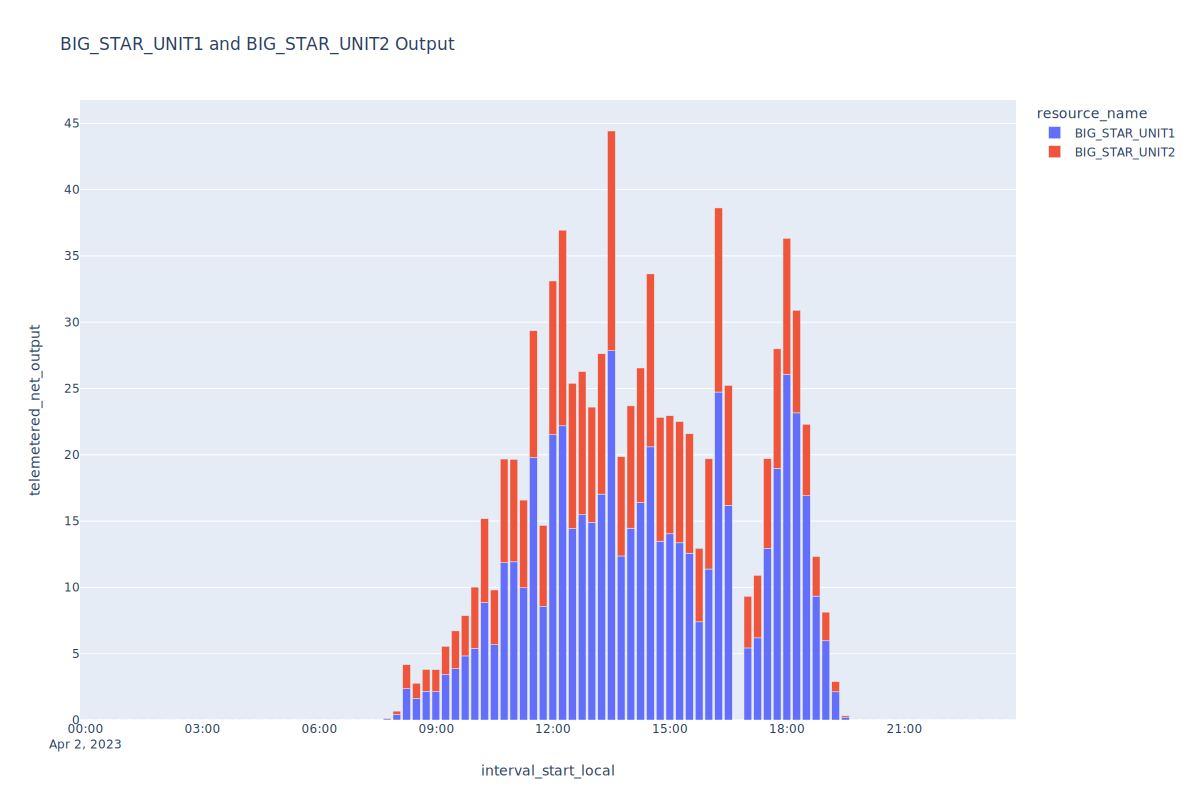

In [25]:
fig = px.bar(
    big_star,
    x="interval_start_local",
    y="telemetered_net_output",
    color="resource_name",
    title="BIG_STAR_UNIT1 and BIG_STAR_UNIT2 Output",
)

fig.show("svg", width=1200, height=800)

And it's that easy! Explore datasets, filter data, and visualize it all in a few lines of code using the gridstatusio client. Hop over to another example notebook to see more.